In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiment_2/results/experiment-f3_experiment_20250104_181244/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,tensor(0.1359),tensor(0.2560),0.206158,tensor(0.9103),tensor(0.4375),0.799527
1,0.01,0,1,tensor(0.3558),tensor(0.3772),0.325390,tensor(0.2927),tensor(0.2552),0.299259
2,0.01,0,2,tensor(0.2579),tensor(0.3742),0.529135,tensor(0.3872),tensor(0.3814),0.305247
3,0.01,0,3,tensor(0.1451),tensor(0.1816),0.212384,tensor(0.3534),tensor(0.2843),0.312292
4,0.01,0,4,tensor(0.1206),tensor(0.1078),0.385556,tensor(0.3496),tensor(0.3433),0.344975


In [3]:
# Convertendo colunas tensor para float
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce')
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,0.1359,0.2560,0.206158,0.9103,0.4375,0.799527
1,0.01,0,1,0.3558,0.3772,0.325390,0.2927,0.2552,0.299259
2,0.01,0,2,0.2579,0.3742,0.529135,0.3872,0.3814,0.305247
3,0.01,0,3,0.1451,0.1816,0.212384,0.3534,0.2843,0.312292
4,0.01,0,4,0.1206,0.1078,0.385556,0.3496,0.3433,0.344975


In [5]:
# Agrupando por 'ratio' e 'facie' e calculando média e desvio padrão
grouped = df.groupby(['ratio', 'facie'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando os nomes das colunas após o agrupamento
grouped.columns = ['ratio', 'facie',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std']
        
# Exibindo o DataFrame resultante
print(grouped)

    ratio  facie  train_loss_mean  train_loss_std  val_loss_mean  \
0    0.01      0          0.24760        0.011879        0.12430   
1    0.01      1          0.37755        0.000495        0.35695   
2    0.01      2          0.37315        0.001485        0.25780   
3    0.01      3          0.18210        0.000707        0.14655   
4    0.01      4          0.10785        0.000071        0.12065   
5    0.01      5          0.06535        0.000071        0.07210   
6    1.00      0          0.01130        0.000000        0.01100   
7    1.00      1          0.02570        0.000141        0.02435   
8    1.00      2          0.02045        0.000495        0.01835   
9    1.00      3          0.01165        0.000495        0.00950   
10   1.00      4          0.05655        0.024254        0.04645   
11   1.00      5          0.04620        0.000566        0.04835   

    val_loss_std  test_loss_mean  test_loss_std  train_mIoU_mean  \
0       0.016405        0.201987       0.005899

In [6]:
grouped

,ratio,facie,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std
0,0.01,0,0.24760,0.011879,0.12430,0.016405,0.201987,0.005899,0.41365,0.033729,0.69760,0.300803,0.644293,0.219534
1,0.01,1,0.37755,0.000495,0.35695,0.001626,0.326438,0.001483,0.25120,0.005657,0.28430,0.011879,0.285018,0.020140
2,0.01,2,0.37315,0.001485,0.25780,0.000141,0.532062,0.004139,0.38215,0.001061,0.38650,0.000990,0.304435,0.001148
3,0.01,3,0.18210,0.000707,0.14655,0.002051,0.215887,0.004955,0.28895,0.006576,0.35255,0.001202,0.308805,0.004932
4,0.01,4,0.10785,0.000071,0.12065,0.000071,0.384348,0.001708,0.34330,0.000000,0.34960,0.000000,0.344975,0.000000
5,0.01,5,0.06535,0.000071,0.07210,0.000849,0.136378,0.001476,0.51420,0.000000,0.78420,0.000000,0.519762,0.000000
6,1.00,0,0.01130,0.000000,0.01100,0.000141,0.045210,0.002967,0.98845,0.000071,0.98875,0.000071,0.960499,0.000367
7,1.00,1,0.02570,0.000141,0.02435,0.000212,0.061346,0.001421,0.95110,0.000141,0.95295,0.000636,0.896777,0.001068
8,1.00,2,0.02045,0.000495,0.01835,0.000212,0.204774,0.010344,0.98325,0.000354,0.98475,0.000071,0.911680,0.000653
9,1.00,3,0.01165,0.000495,0.00950,0.000000,0.125923,0.002861,0.95090,0.001838,0.96165,0.000212,0.791481,0.000165


/tmp/ipykernel_2264677/3271170230.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


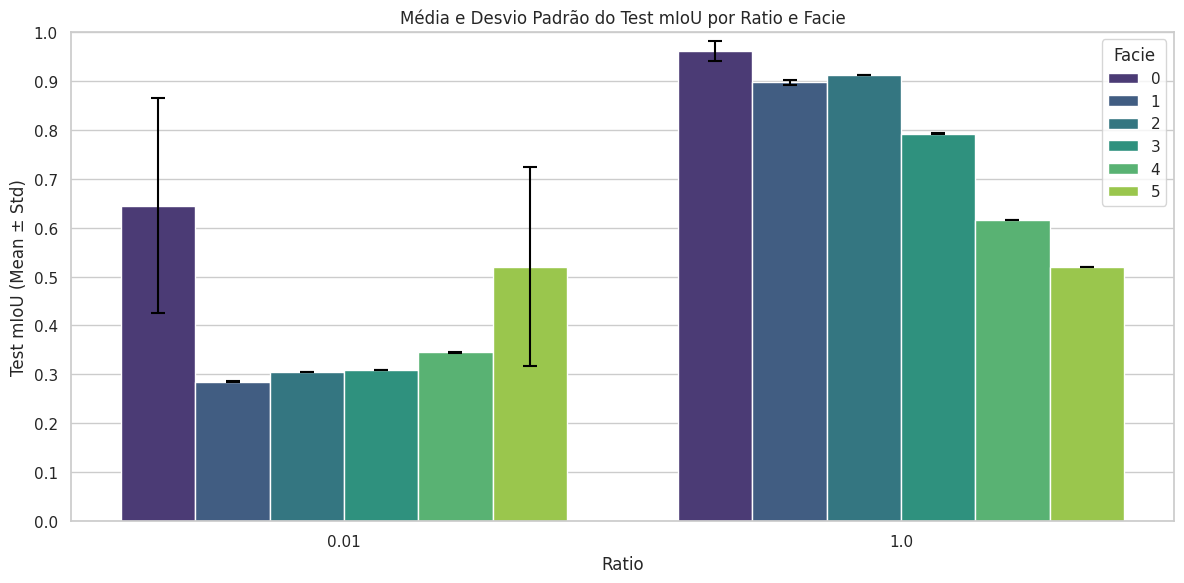

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando o estilo
sns.set(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando as médias com desvio padrão, agrupando por ratio
barplot = sns.barplot(
    data=grouped,
    x='ratio',  # Eixo X será o ratio
    y='test_mIoU_mean',  # Valores de média
    hue='facie',  # Diferencia pelas facies
    ci=None,  # Desativa o intervalo de confiança
    palette='viridis',  # Paleta de cores
    capsize=0.1,  # Tamanho das extremidades das barras de erro
    errwidth=1.5  # Largura das barras de erro
)

# Adicionando desvio padrão como linhas de erro
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()  # Altura (média)
    error = grouped.iloc[i]['test_mIoU_std']  # Desvio padrão correspondente
    barplot.errorbar(
        x=bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        y=height,  # Valor no eixo Y (média)
        yerr=error,  # Desvio padrão
        fmt='none',  # Formato para não exibir marcador
        color='black',  # Cor da linha de erro
        capsize=5,  # Tamanho das extremidades das barras de erro
        elinewidth=1.5,  # Largura da linha de erro
        capthick=1.5  # Espessura das extremidades
    )

# Ajustando a escala do eixo Y de 0 a 1, de 0.1 em 0.1
plt.ylim(0, 1)  # Limita os valores do eixo Y
plt.yticks(np.arange(0, 1.1, 0.1))  # Define os ticks do eixo Y de 0 a 1 com intervalo de 0.1

# Personalização do gráfico
plt.title('Média e Desvio Padrão do Test mIoU por Ratio e Facie')
plt.xlabel('Ratio')
plt.ylabel('Test mIoU (Mean ± Std)')
plt.legend(title='Facie')

# Exibindo o gráfico
plt.tight_layout()
plt.show()